<a href="https://colab.research.google.com/github/dhanhyuti/assignment/blob/main/boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Records where medv ranges between 10 to 15 k dollars:
      Unnamed: 0      crim    zn  indus  chas    nox     rm    age     dis  \
10           11   0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467   
20           21   1.25179   0.0   8.14     0  0.538  5.570   98.1  3.7979   
23           24   0.98843   0.0   8.14     0  0.538  5.813  100.0  4.0952   
25           26   0.84054   0.0   8.14     0  0.538  5.599   85.7  4.4546   
27           28   0.95577   0.0   8.14     0  0.538  6.047   88.8  4.4534   
..          ...       ...   ...    ...   ...    ...    ...    ...     ...   
475         476   6.39312   0.0  18.10     0  0.584  6.162   97.4  2.2060   
477         478  15.02340   0.0  18.10     0  0.614  5.304   97.3  2.1007   
478         479  10.23300   0.0  18.10     0  0.614  6.185   96.7  2.1705   
491         492   0.10574   0.0  27.74     0  0.609  5.983   98.8  1.8681   
505         506   0.04741   0.0  11.93     0  0.573  6.030   80.8  2.5050   

     rad  tax  ptra

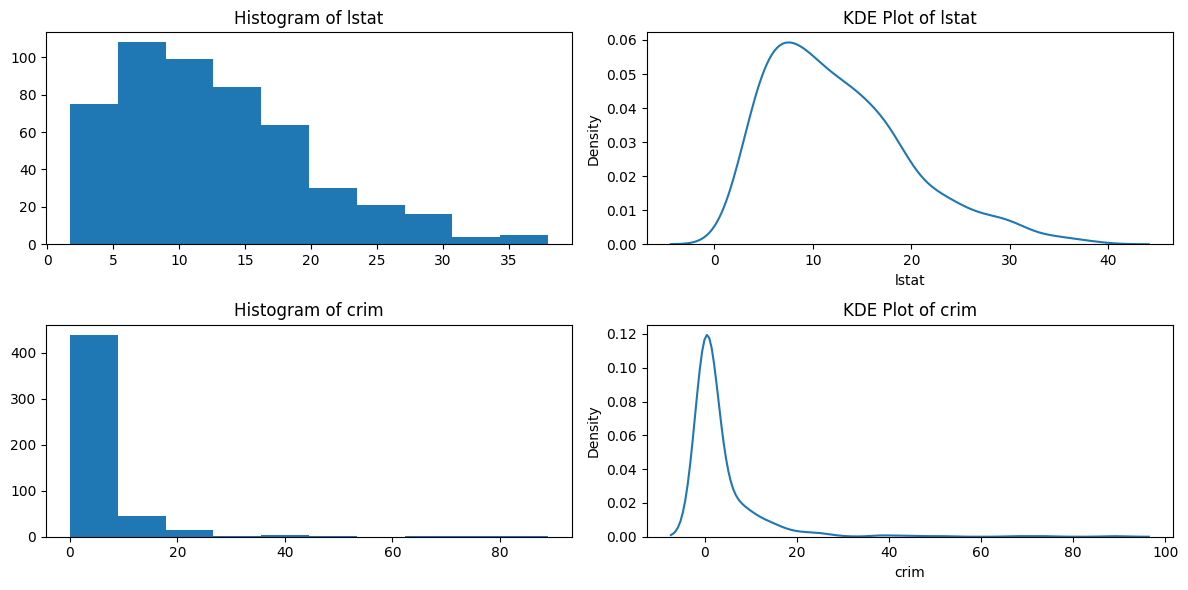

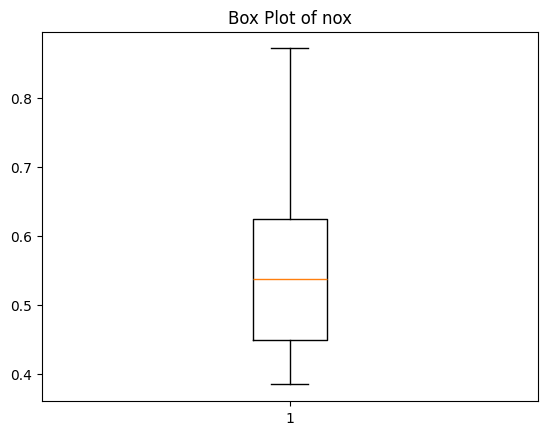


Outliers for medv:
 Empty DataFrame
Columns: [Unnamed: 0, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv]
Index: []

Average crime rate as per rad:
 rad
1      0.036029
2      0.083285
3      0.097359
4      0.393903
5      0.687792
6      0.150054
7      0.150399
8      0.371410
24    12.759291
Name: crim, dtype: float64

Descriptive statistics for indus:
 count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: indus, dtype: float64


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 1. Load the dataset from boston.csv
boston_df = pd.read_csv('/content/load_boston.csv')

# 1. Print records where "medv" ranges between 10 to 15 k dollars
filtered_data = boston_df[(boston_df['medv'] >= 10) & (boston_df['medv'] <= 15)]
print("\nRecords where medv ranges between 10 to 15 k dollars:\n", filtered_data)

# 2. Print price (medv) and crime rate (crim) of property on the bank of river charles (chas)
river_charles_properties = boston_df[boston_df['chas'] == 1][['medv', 'crim']]
print("\nPrice and crime rate of property on the bank of river charles:\n", river_charles_properties)

# 3. Print the correlation matrix
correlation_matrix = boston_df.corr()
print("\nCorrelation matrix:\n", correlation_matrix)

# 4. Print the data types
print("\nData types:\n", boston_df.dtypes)

# 5. Print the average price of the property as per "chas"
avg_price_by_chas = boston_df.groupby('chas')['medv'].mean()
print("\nAverage price of the property as per chas:\n", avg_price_by_chas)

# 6. Print histogram and kdeplot for the columns "lstat" and "crim"
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(boston_df['lstat'], bins=10)
plt.title('Histogram of lstat')

plt.subplot(2, 2, 2)
sns.kdeplot(boston_df['lstat'])
plt.title('KDE Plot of lstat')

plt.subplot(2, 2, 3)
plt.hist(boston_df['crim'], bins=10)
plt.title('Histogram of crim')

plt.subplot(2, 2, 4)
sns.kdeplot(boston_df['crim'])
plt.title('KDE Plot of crim')

plt.tight_layout()
plt.show()

# Inferences for "lstat" and "crim":
# - lstat: The histogram and KDE plot suggest that 'lstat' might be slightly right-skewed.
# - crim: The histogram and KDE plot show that 'crim' is heavily right-skewed, indicating a concentration of lower crime rates and a few areas with very high crime rates.

# 7. Print the boxplot for the column "nox"
plt.boxplot(boston_df['nox'])
plt.title('Box Plot of nox')
plt.show()

# 8. Filter outliers for "medv"
z_scores = np.abs(stats.zscore(boston_df['medv']))
outliers = boston_df[(z_scores > 3)]  # Using a threshold of 3 standard deviations
print("\nOutliers for medv:\n", outliers)

# 9. Print the average crime rate (crim) as per the number of radial highways (rad)
avg_crim_by_rad = boston_df.groupby('rad')['crim'].mean()
print("\nAverage crime rate as per rad:\n", avg_crim_by_rad)

# 10. Print descriptive statistics for "indus"
print("\nDescriptive statistics for indus:\n", boston_df['indus'].describe())

# To see the output, run the code.